# Project: 'ml_Titanic'

## Part 1: Data Analysis 

In [1]:
# Import packages
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
# Load dat
dir_data = './data/'

train_file = os.path.join(dir_data, 'train.csv')
test_file = os.path.join(dir_data, 'test.csv')

train_df = pd.read_csv(train_file)

In [3]:
# A quick look at data
print('Data summary:')
print(train_df.describe())

Data summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print('Data columns:')
for col in train_df.columns:
    print('  ', col)

Data columns:
   PassengerId
   Survived
   Pclass
   Name
   Sex
   Age
   SibSp
   Parch
   Ticket
   Fare
   Cabin
   Embarked


In [6]:
print('Data types:')
train_df.get_dtype_counts()

Data types:


float64    2
int64      5
object     5
dtype: int64

Numbers of original columns: 7
Numbers of remained columns: 6


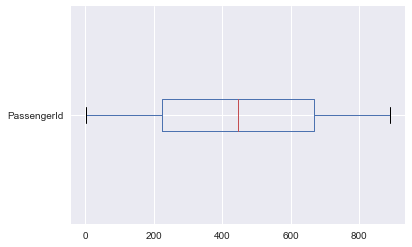

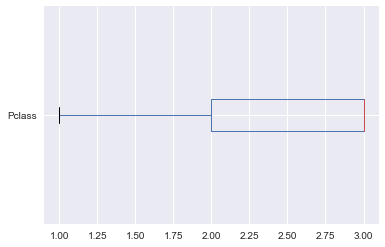

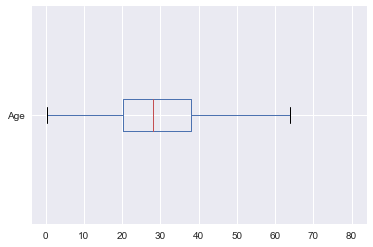

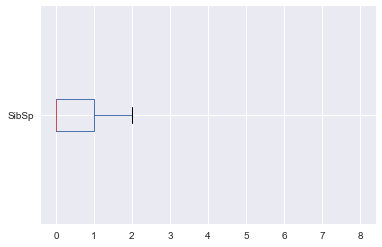

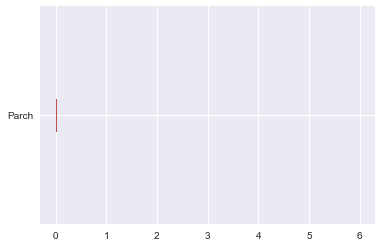

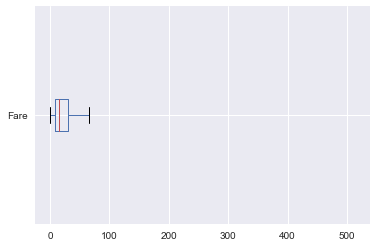

In [7]:
# 先篩選數值型的欄位
numeric_columns = train_df.select_dtypes(include=['number'])
print("Numbers of original columns: %d" % len(numeric_columns.columns))

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
for col in numeric_columns:
    if numeric_columns[col].nunique() == 2:
        numeric_columns = numeric_columns.drop(col, axis=1)

print("Numbers of remained columns: %d" % len(numeric_columns.columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    numeric_columns[col].plot.box(vert=False)
    plt.show()